In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load the Data into a Dataframe
Plant_Data=pd.read_csv('Folds5x2_pp.csv')

In [3]:
#Check the sample input data
Plant_Data.sample(5)

,AT,V,AP,RH,PE
1466,16.17,41.79,1005.78,78.80,454.72
3205,21.14,58.05,1012.98,87.27,449.74
2398,25.32,63.77,1014.55,74.69,441.50
3585,24.34,66.05,1019.26,74.58,440.67
5157,22.26,60.37,1008.14,92.37,441.33


The column names are to be renamed to make more sense

In [5]:
#Rename columns to appropriate names
Plant_Data= Plant_Data.rename(columns={'AT':'AmbientTemperature','V':'Exhaust_Vaccum','AP':'AmbientPressure','RH':'Relative_Humidity','PE':'Net_Hourly_Energy'})

In [6]:
Plant_Data.sample(5)

,AmbientTemperature,Exhaust_Vaccum,AmbientPressure,Relative_Humidity,Net_Hourly_Energy
5254,13.10,40.03,1017.79,84.48,470.75
1597,11.82,41.17,1019.50,55.74,475.61
3839,11.23,43.70,1016.00,91.75,476.04
331,7.53,43.65,1018.58,64.85,479.15
8603,21.33,63.86,1020.33,72.13,445.02


In [7]:
#Check the statistical details of the data
Plant_Data.describe()

,AmbientTemperature,Exhaust_Vaccum,AmbientPressure,Relative_Humidity,Net_Hourly_Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


The data is well distributed without much variation from the mean values. Also there seems to be no Outlier problem.Lets check if the available features are normally distributed

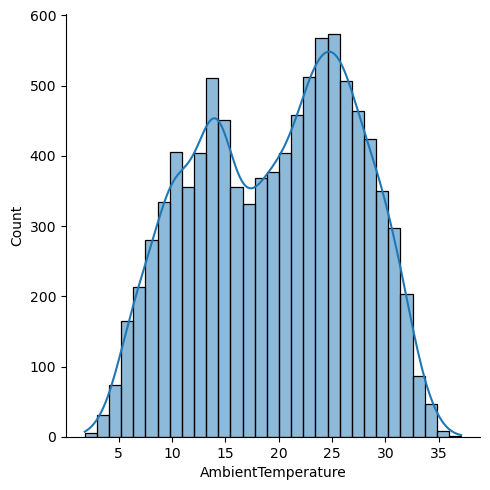

In [17]:
#Histogram plot for Ambient Temperature data
sns.displot(x=Plant_Data['AmbientTemperature'],kde=True)
plt.show()

This is alright as long as the distribtion is not too much skewed to left or right in which case the data will be baised.
The data is also not a flat distribution (Kurtosis > 3 ) in which case there wont be any pattern to the data making the learning process and predictions difficult. Just to check lets check the kurtosis of this feature. Kurtosis greater than 3 means a Distribution that centrally peaked and can have high ouliers, whereas kurtosis < 3 means a distribution with light tails and less outliers

In [18]:
#Kurtosis 
Plant_Data['AmbientTemperature'].kurtosis()

-1.0375491923092457

The kurtosis value is less than 3 which is alright, indicates less outliers, but we may have scale and normalize this data to make it truely normally distributed.

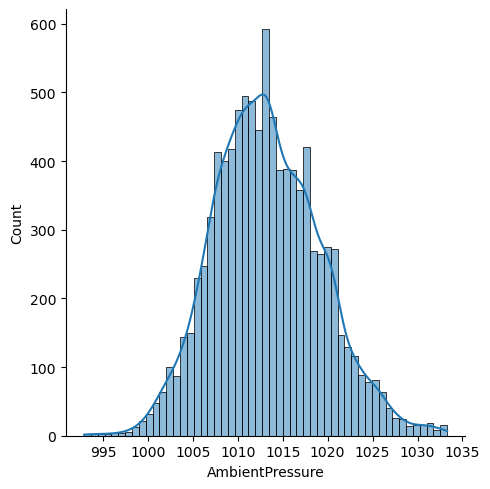

In [20]:
sns.displot(x=Plant_Data['AmbientPressure'],kde=True)
plt.show()

In [19]:
#Kurtosis 
Plant_Data['AmbientPressure'].kurtosis()

0.0942371953033132

The ambient pressure data seems very close to a perfect normal distribution which is reflected by the near zero kurtosis value. This makes sense because the atmospheric pressure rarely fluctuates from the daily normal value

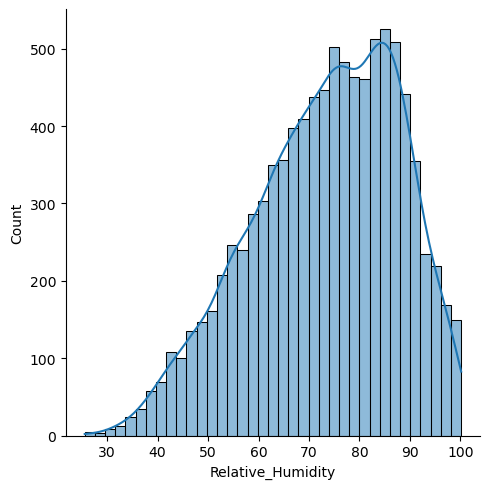

In [23]:
sns.displot(x=Plant_Data['Relative_Humidity'],kde=True)
plt.show()

In [26]:
#Kurtosis 
Plant_Data['Relative_Humidity'].kurtosis()


-0.4445263744874084

The raltive humidity data appears to be biased but it is actually not, because the daily Relative Humidity values are on the higher side especially in the tropics. A simple normalization would fix this

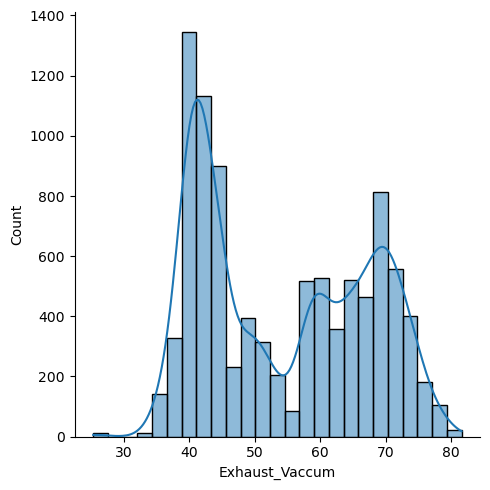

In [27]:
sns.displot(x=Plant_Data['Exhaust_Vaccum'],kde=True)
plt.show()

In [28]:
#Kurtosis 
Plant_Data['Exhaust_Vaccum'].kurtosis()

-1.4443366772319615

The Exhaust vaccum data also needs to be handled to make it normal

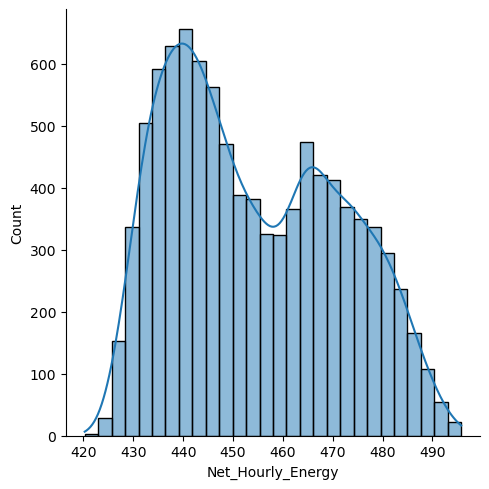

In [31]:
sns.displot(x=Plant_Data['Net_Hourly_Energy'],kde=True)
plt.show()

In [30]:
#Kurtosis 
Plant_Data['Net_Hourly_Energy'].kurtosis()

-1.0485209686925079

The Net Hourly energy also exhbits biModality and needs to be handled to make it normal

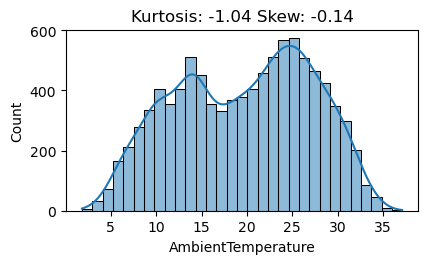

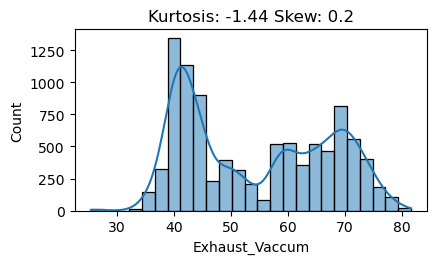

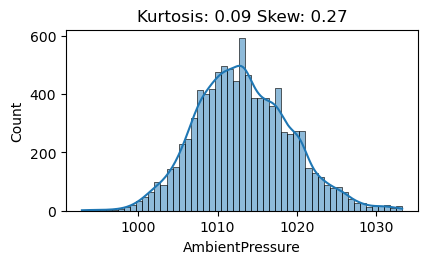

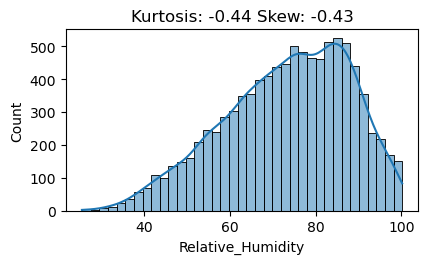

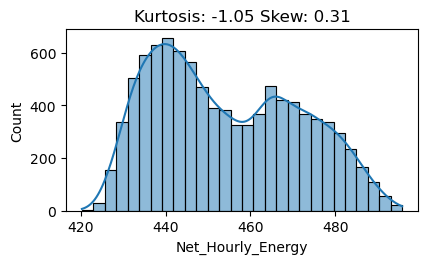

In [50]:

j=1
for col in Plant_Data.columns:
    plt.figure(figsize=(10,8))
    plt.subplot(3,2,j)
    sns.histplot(Plant_Data[col],kde=True)
    kurt=round(Plant_Data[col].kurtosis(),2)
    skew=round(Plant_Data[col].skew(),2)
    plt.title("Kurtosis: {} Skew: {}".format(kurt,skew))
    plt.show()
    j+=1

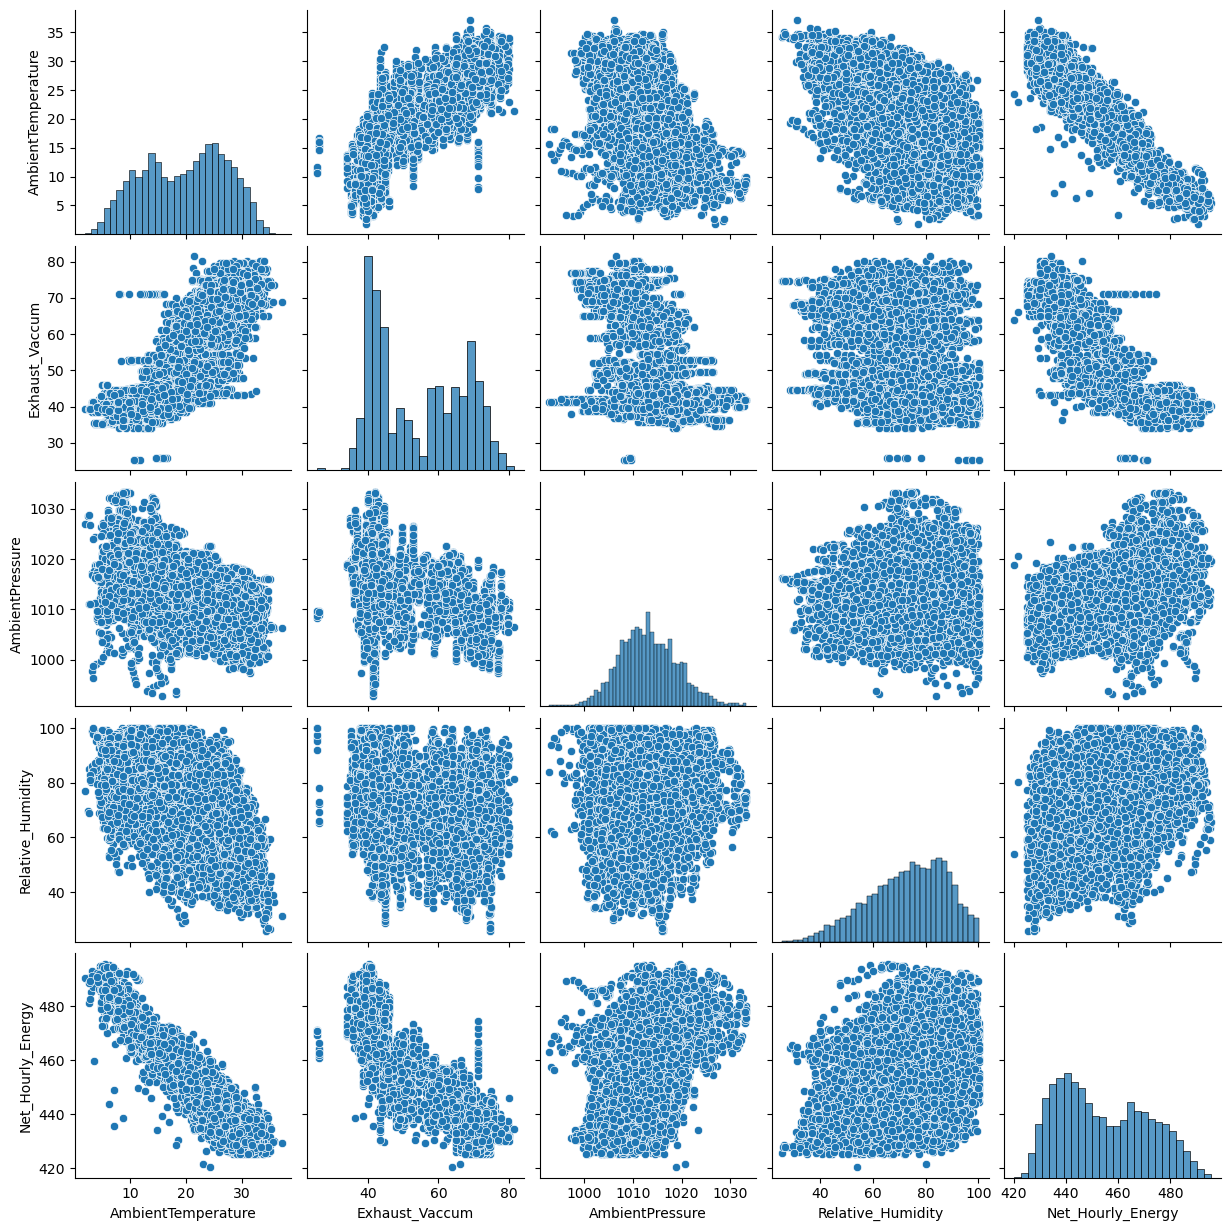

In [49]:
sns.pairplot(data=Plant_Data)

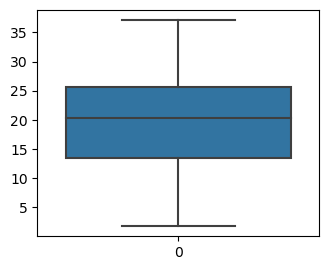

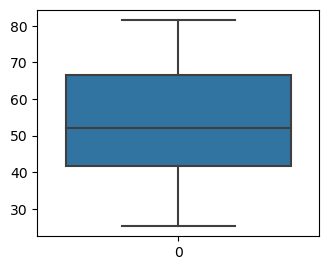

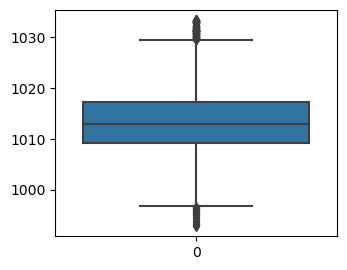

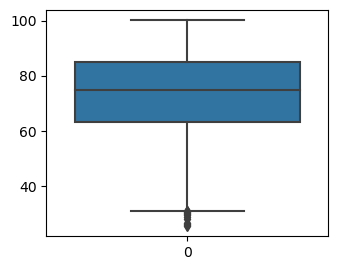

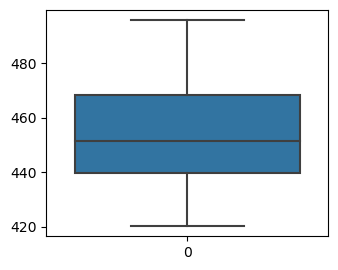

In [52]:
j=1
for col in Plant_Data.columns:
    plt.figure(figsize=(8,10))
    plt.subplot(3,2,j)
    sns.boxplot(data=Plant_Data[col])
    plt.show()
    j+=1

The data infact seems to have very few outliers

Lets check the correlation of these features 

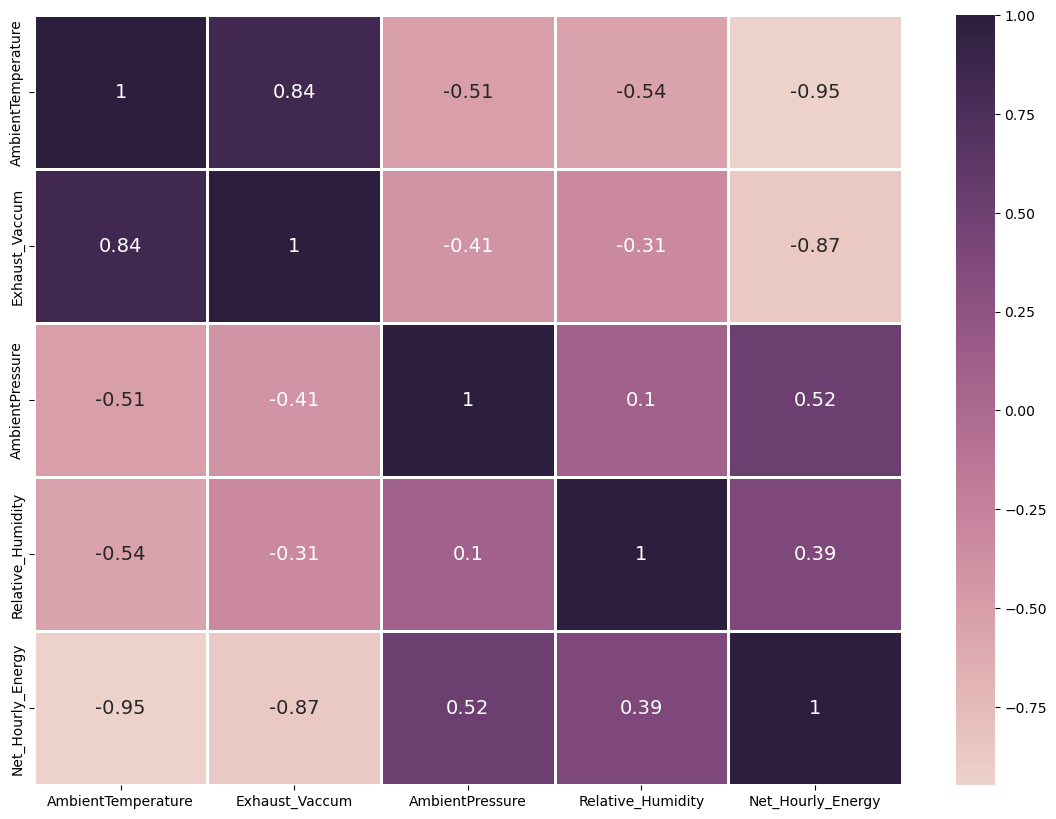

In [60]:
plt.figure(figsize=(14,10))
sns.heatmap(Plant_Data.corr(),linewidths=1,annot=True,annot_kws={"fontsize":14},cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

Correleation is statistical measures which tells how are the variables related to each other. Two highly correlated varibales would mean that they carry the same information and one of them can be often ignored. The correlation plot shows that Net Hourly Energy has a high Negative correlation with AMbient Temperature and Exhaust Vaccum. and has a low positive correlation with AMbient Pressure and Relative Humidity

Lets prepare the data for training. We need to seperate the feature variables and Target variables. In this case we need to predict the hourly Energy of the plant so this will be our target variable, all other variables are input variables

In [61]:
X=Plant_Data.drop('Net_Hourly_Energy',axis=1)
y=Plant_Data['Net_Hourly_Energy']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
X_Train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [67]:
print(X_Train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7654, 4)
(7654,)
(1914, 4)
(1914,)


We previously saw that some of feature variables may need some normalization and scaling. Moreover the Each input variable is Physical quantity measured in its own units. Hence the numeric data is in different magnitudes and needs to be standardized,other wise higher magnitude numbers will be given higher weightage

In [69]:
Scaler=StandardScaler()
X_train=Scaler.fit_transform(X_Train)
X_test=Scaler.transform(X_test)

In [79]:
import tensorflow as tf
#tf.config.list_physical_devices('GPU')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [78]:
model=Sequential([
                    Dense(units=32,activation="relu"),
                    Dense(units=1)
])

In [81]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [86]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=80,batch_size=32)

Epoch 1/80
240/240 [==============================] - 1s 3ms/step - loss: 17.8949 - val_loss: 17.0803
Epoch 2/80
240/240 [==============================] - 1s 3ms/step - loss: 17.9247 - val_loss: 16.8199
Epoch 3/80
240/240 [==============================] - 1s 3ms/step - loss: 17.9287 - val_loss: 17.1799
Epoch 4/80
240/240 [==============================] - 1s 3ms/step - loss: 17.9370 - val_loss: 16.9466
Epoch 5/80
240/240 [==============================] - 1s 3ms/step - loss: 17.8988 - val_loss: 16.8895
Epoch 6/80
240/240 [==============================] - 1s 3ms/step - loss: 17.8823 - val_loss: 17.0336
Epoch 7/80
240/240 [==============================] - 1s 3ms/step - loss: 17.9293 - val_loss: 16.8664
Epoch 8/80
240/240 [==============================] - 1s 3ms/step - loss: 17.8781 - val_loss: 16.9299
Epoch 9/80
240/240 [==============================] - 1s 3ms/step - loss: 17.9688 - val_loss: 17.0262
Epoch 10/80
240/240 [==============================] - 1s 3ms/step - loss: 17.9417

In [105]:
def plot_model_loss_accurarcy(history):
    #acc = history.history['loss']
    #val_acc = history.history['val_loss]

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    #epochs_range = range(epochs)
    epochs_range=range(len(history.history['loss']))

    # plt.figure(figsize=(16, 8))
    # plt.subplot(1, 2, 1)
    # plt.plot(epochs_range, acc, label='Training Accuracy')
    # plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    # plt.legend(loc='lower right')
    # plt.title('Training and Validation Accuracy')

    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

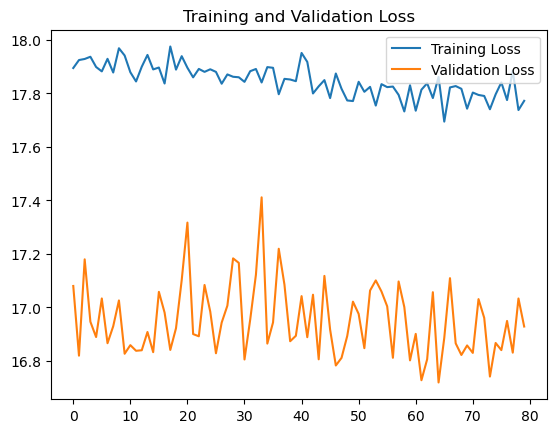

In [106]:
plot_model_loss_accurarcy(history)

In [107]:
predictions=model.predict(X_test)
print(predictions)

60/60 [==============================] - 0s 1ms/step
[[437.37375]
 [436.226  ]
 [458.67477]
 ...
 [467.97076]
 [433.046  ]
 [456.54678]]
